In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\user\Downloads\02 Churn-Dataset.xlsx")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [4]:
df.shape

(7043, 23)

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [8]:
df['TotalCharges'] = pd.to_numeric(df["TotalCharges"], errors = "coerce")
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(int)

In [9]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype
--------------  -----
7043 non-null   int32
dtypes: int32(1)
memory usage: 27.6 KB


In [10]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [11]:
df['SeniorCitizen'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [12]:
df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)

In [13]:
df.replace('Bank transfer (automatic)', 'Bank transfer', inplace=True)
df.replace('Credit card (automatic)', 'Credit card', inplace=True)

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2282.830754,0.515689,0.419566
std,0.368612,24.559481,30.090047,2264.997388,1.275299,1.250117
min,0.000000,0.000000,18.250000,18.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,401.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1400.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.500000,0.000000,0.000000
max,1.000000,72.000000,118.750000,8684.000000,5.000000,9.000000


In [15]:
print(df['gender'].value_counts())
print(df['Partner'].value_counts())
print(df['Dependents'].value_counts())
print(df['PhoneService'].value_counts())
print(df['MultipleLines'].value_counts())
print(df['InternetService'].value_counts())
print(df['OnlineSecurity'].value_counts())
print(df['OnlineBackup'].value_counts())
print(df['DeviceProtection'].value_counts())
print(df['TechSupport'].value_counts())
print(df['StreamingTV'].value_counts())
print(df['StreamingMovies'].value_counts())
print(df['Contract'].value_counts())
print(df['PaperlessBilling'].value_counts())
print(df['PaymentMethod'].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No     4072
Yes    2971
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
No     4999
Yes    2044
Name: TechSupport, dtype: int64
No     4336
Yes    2707
Name: StreamingTV, dtype: int64
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
Electronic check    2365
Mailed check        1612
Bank transfer       1544
Credit card         1522
Name: PaymentMeth

In [16]:
print(df['Churn'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_10688\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

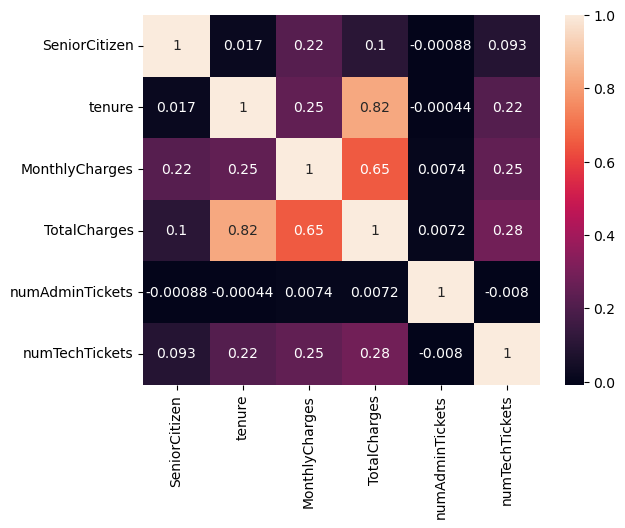

In [17]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='SeniorCitizen', ylabel='count'>

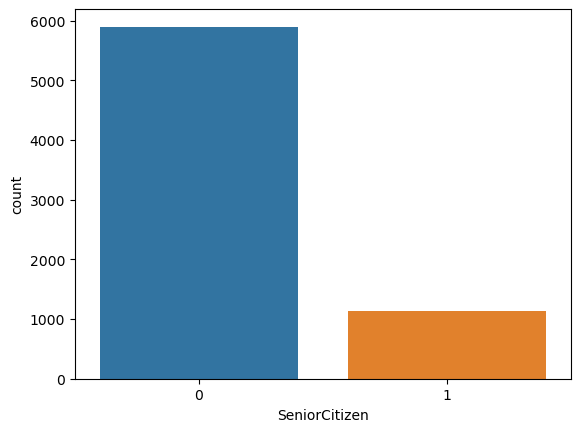

In [18]:
sns.countplot(x='SeniorCitizen', data=df)

<Axes: xlabel='StreamingTV', ylabel='count'>

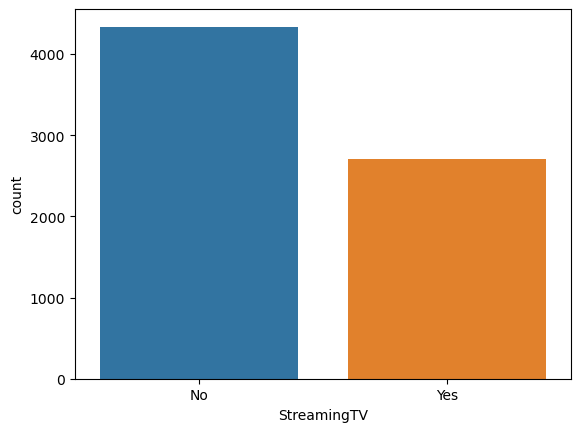

In [19]:
sns.countplot(x='StreamingTV', data=df)

<Axes: xlabel='Partner', ylabel='count'>

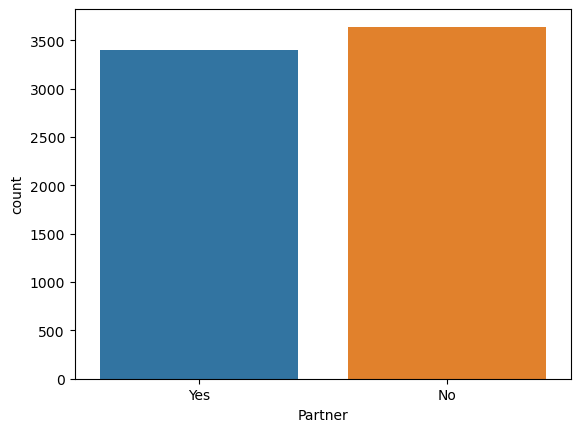

In [20]:
sns.countplot(x='Partner', data=df)

<Axes: xlabel='Dependents', ylabel='count'>

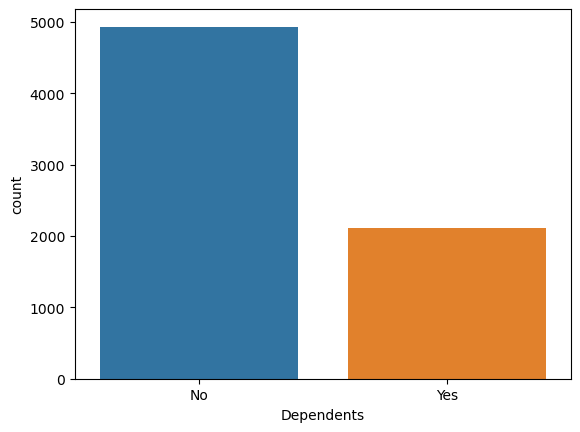

In [21]:
 sns.countplot(x='Dependents', data=df) 

<Axes: xlabel='PhoneService', ylabel='count'>

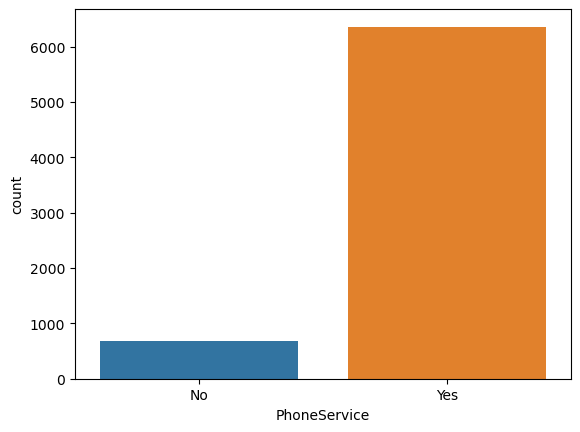

In [22]:
 sns.countplot(x='PhoneService', data=df) 

<Axes: xlabel='MultipleLines', ylabel='count'>

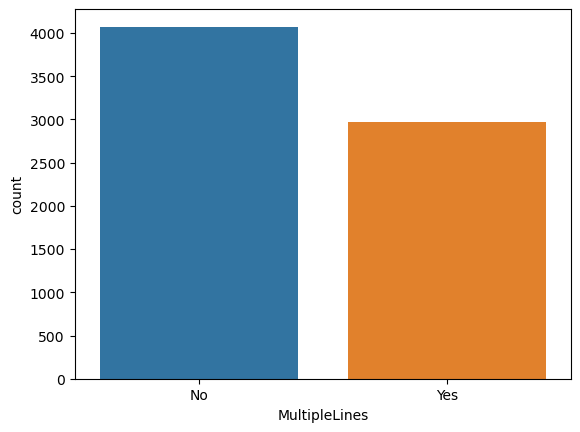

In [23]:
sns.countplot(x='MultipleLines', data=df) 

<Axes: xlabel='InternetService', ylabel='count'>

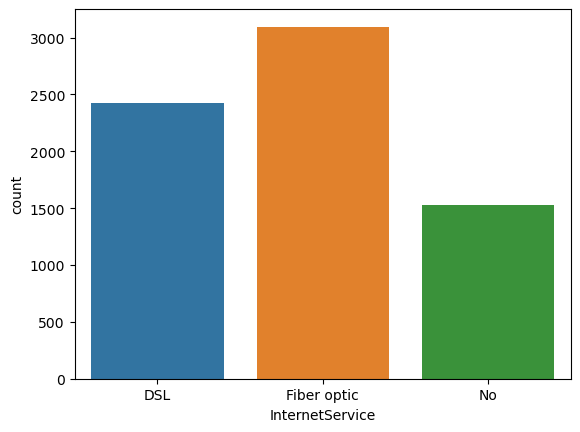

In [24]:
sns.countplot(x='InternetService', data=df) 

<Axes: xlabel='OnlineSecurity', ylabel='count'>

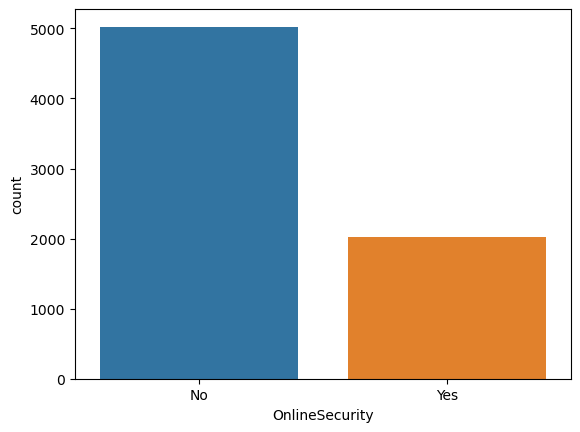

In [25]:
sns.countplot(x='OnlineSecurity', data=df) 

<Axes: xlabel='OnlineBackup', ylabel='count'>

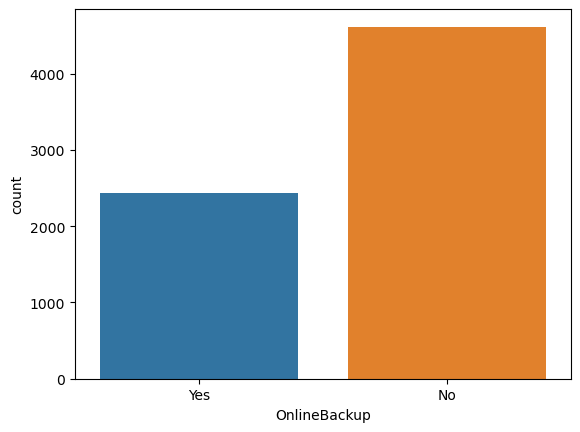

In [26]:
sns.countplot(x='OnlineBackup', data=df) 

<Axes: xlabel='DeviceProtection', ylabel='count'>

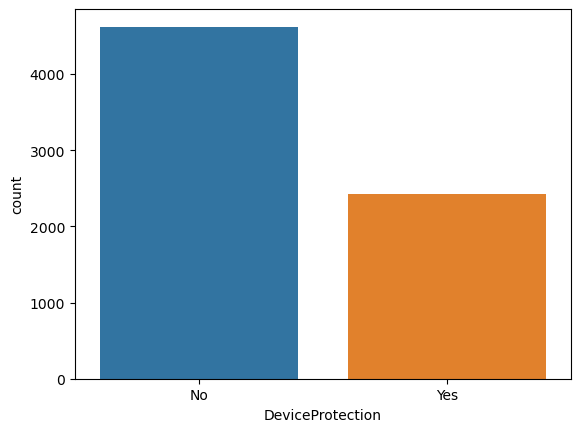

In [27]:
sns.countplot(x='DeviceProtection', data=df) 

<Axes: xlabel='TechSupport', ylabel='count'>

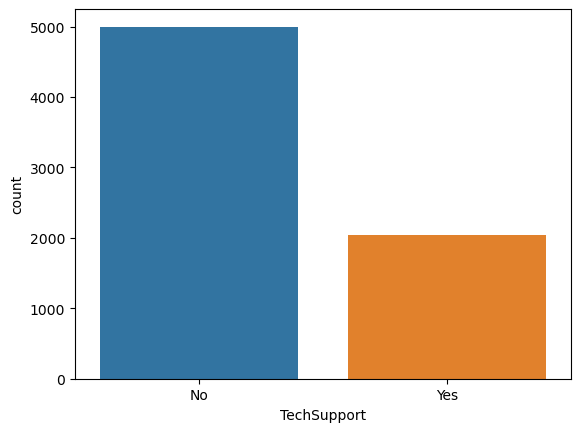

In [28]:
sns.countplot(x='TechSupport', data=df) 

<Axes: xlabel='StreamingMovies', ylabel='count'>

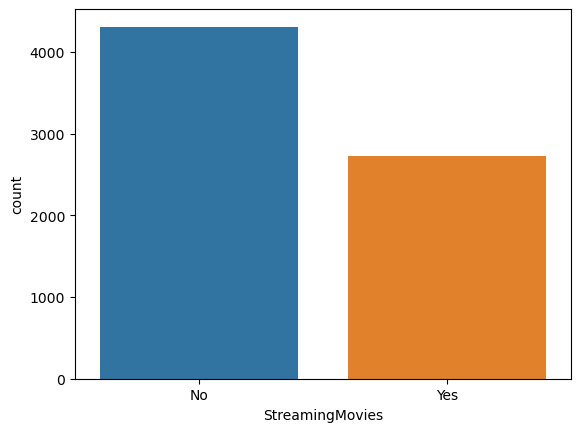

In [29]:
sns.countplot(x='StreamingMovies', data=df) 

<Axes: xlabel='Contract', ylabel='count'>

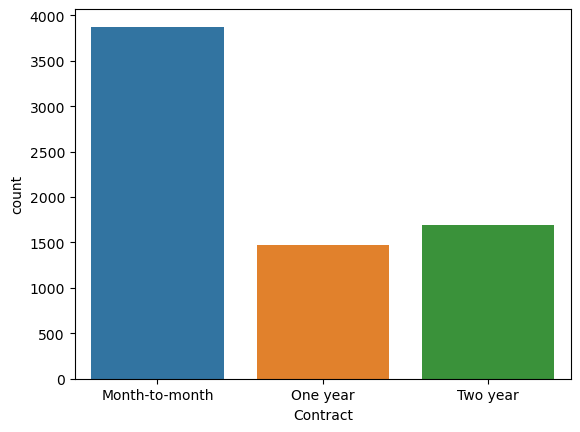

In [30]:
sns.countplot(x='Contract', data=df) 

<Axes: xlabel='PaperlessBilling', ylabel='count'>

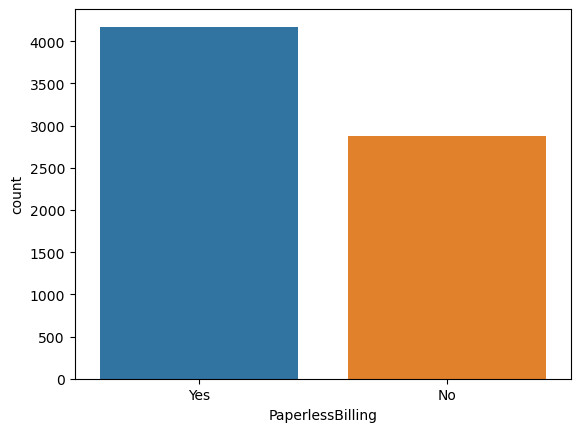

In [31]:
sns.countplot(x='PaperlessBilling', data=df)

<Axes: xlabel='PaymentMethod', ylabel='count'>

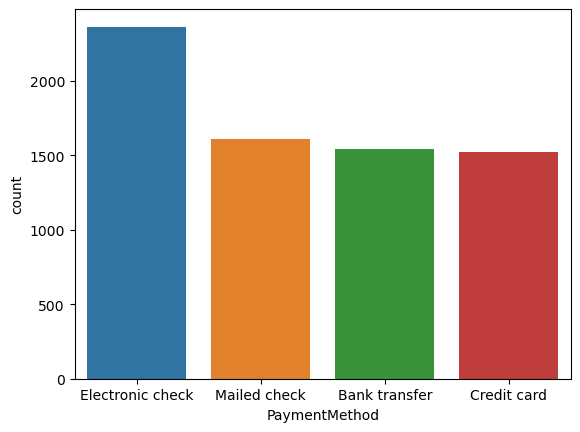

In [32]:
sns.countplot(x='PaymentMethod', data=df)

<Axes: xlabel='Churn', ylabel='count'>

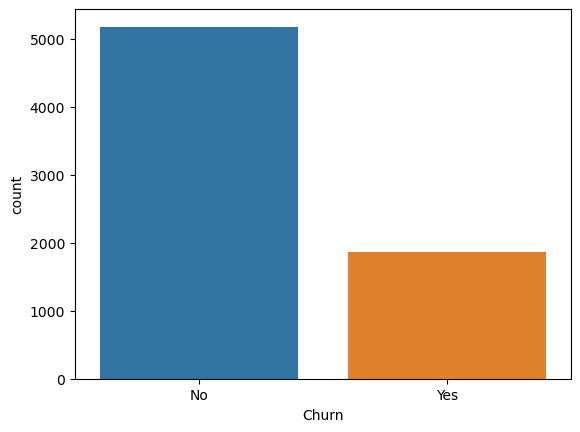

In [33]:
sns.countplot(x='Churn', data=df)

Text(0, 0.5, 'Percentage Churn %')

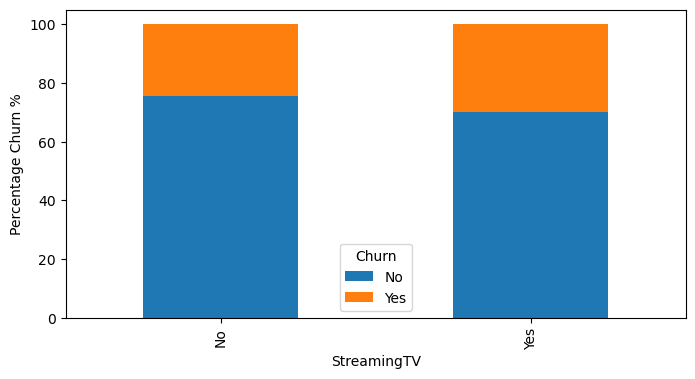

In [34]:
(pd.crosstab(df['StreamingTV'],df['Churn'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Churn %')

Text(0, 0.5, 'Percentage Churn %')

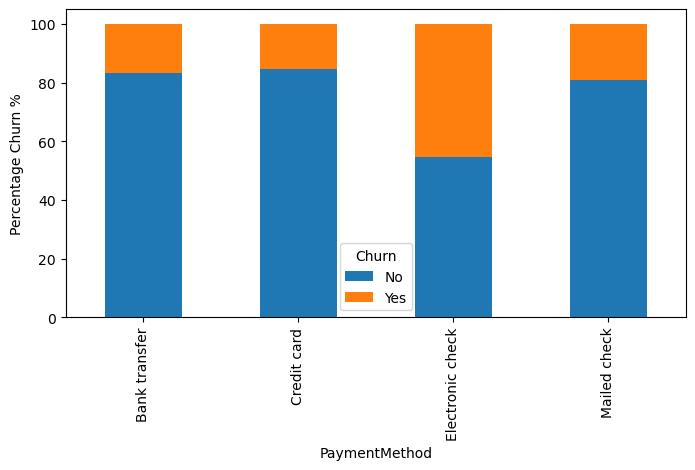

In [35]:
(pd.crosstab(df['PaymentMethod'],df['Churn'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Churn %')

Text(0, 0.5, 'Percentage Churn %')

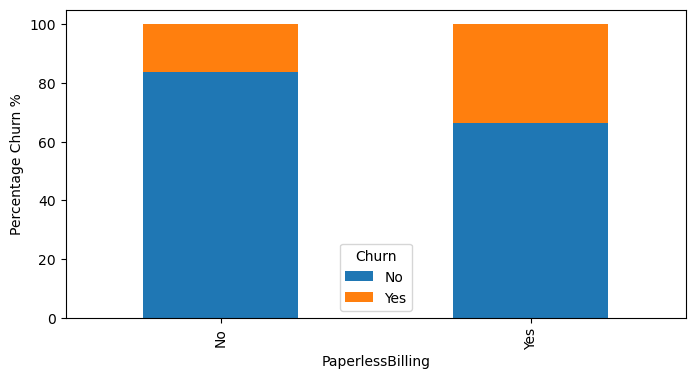

In [36]:
(pd.crosstab(df['PaperlessBilling'],df['Churn'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Churn %')

Text(0, 0.5, 'Percentage Churn %')

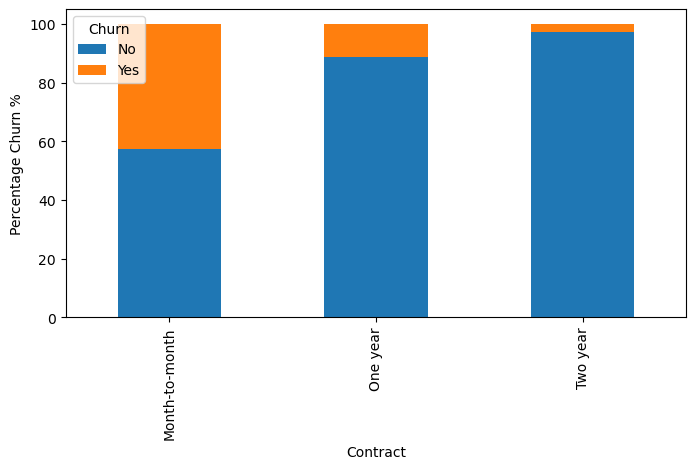

In [37]:
(pd.crosstab(df['Contract'],df['Churn'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Churn %')

Text(0, 0.5, 'Percentage Churn %')

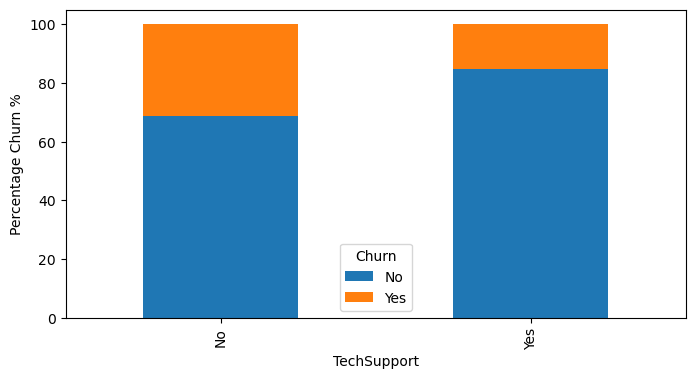

In [38]:
(pd.crosstab(df['TechSupport'],df['Churn'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Churn %')

Text(0, 0.5, 'Percentage Churn %')

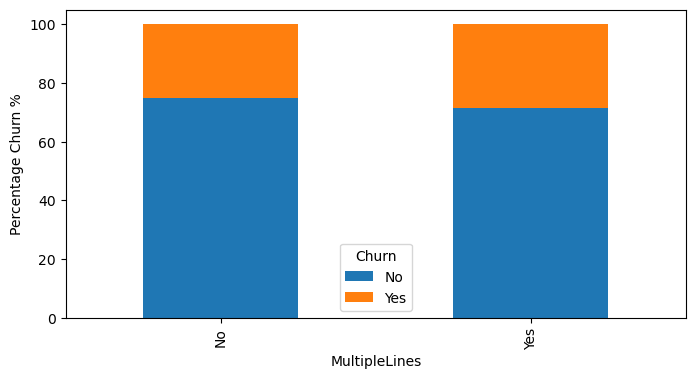

In [39]:
(pd.crosstab(df['MultipleLines'],df['Churn'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Churn %')

Text(0, 0.5, 'Percentage Churn %')

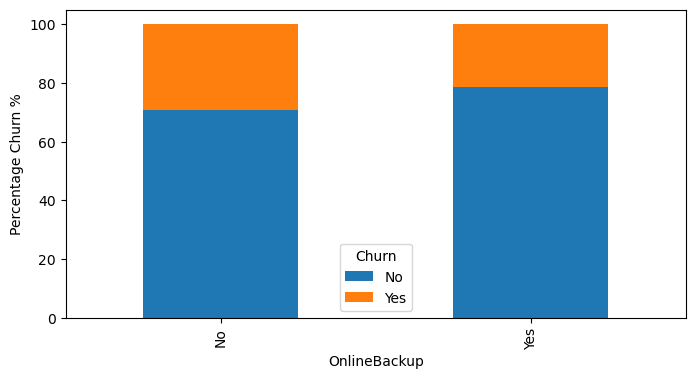

In [40]:
(pd.crosstab(df['OnlineBackup'],df['Churn'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Churn %')

Text(0, 0.5, 'Percentage Churn %')

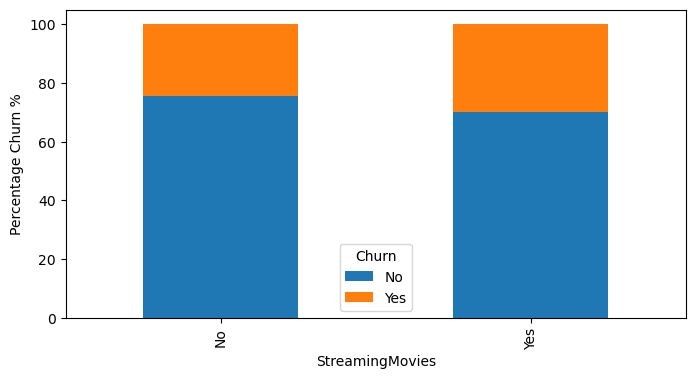

In [41]:
(pd.crosstab(df['StreamingMovies'],df['Churn'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Churn %')

Text(0, 0.5, 'Percentage Churn %')

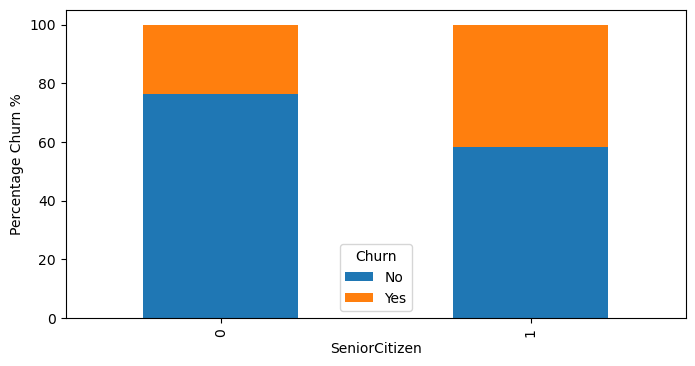

In [42]:
(pd.crosstab(df['SeniorCitizen'],df['Churn'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Churn %')

Text(0, 0.5, 'Percentage Churn %')

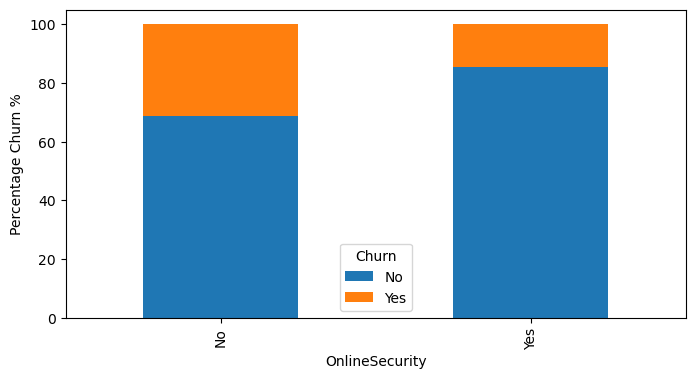

In [43]:
(pd.crosstab(df['OnlineSecurity'],df['Churn'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Churn %')

Text(0, 0.5, 'Percentage Churn %')

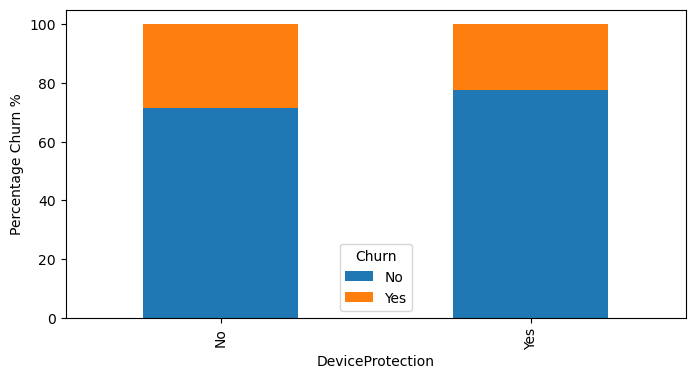

In [44]:
(pd.crosstab(df['DeviceProtection'],df['Churn'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Churn %')

Text(0, 0.5, 'Percentage Churn %')

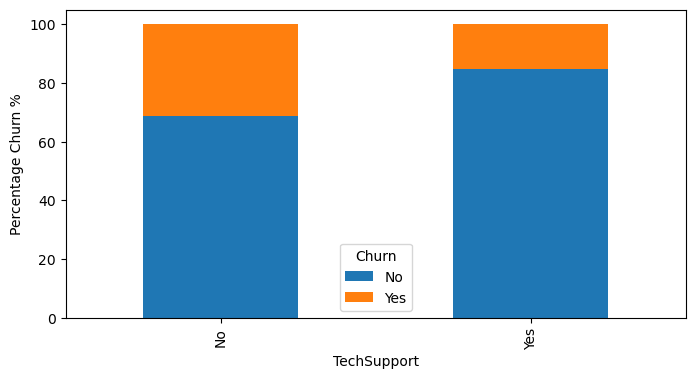

In [45]:
(pd.crosstab(df['TechSupport'],df['Churn'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Churn %')

<Axes: xlabel='tenure'>

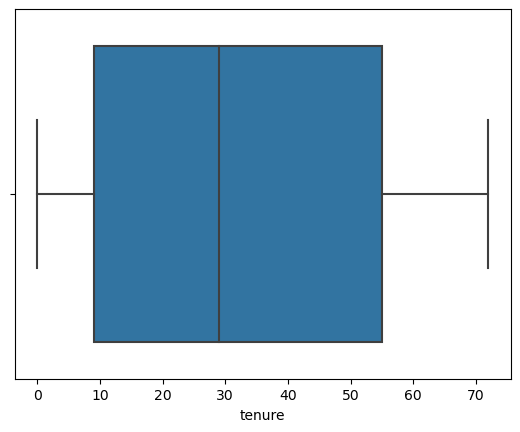

In [46]:
sns.boxplot(x='tenure', data=df)

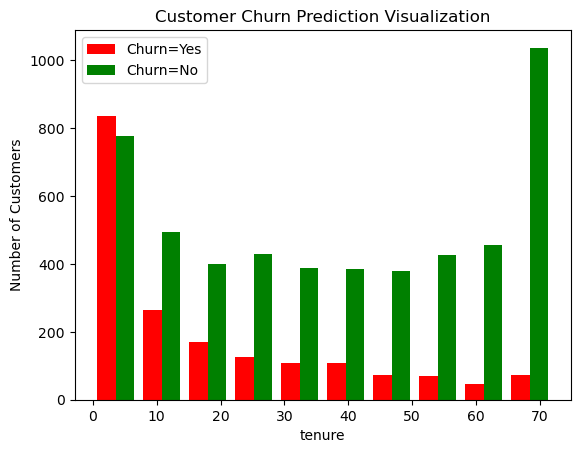

In [47]:
tenure_Churn_no = df[df.Churn=='No'].tenure
tenure_Churn_Yes = df[df.Churn=='Yes'].tenure
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_Churn_Yes, tenure_Churn_no], color=['red', 'green'], label=['Churn=Yes','Churn=No'])
plt.legend()

<Axes: xlabel='MonthlyCharges'>

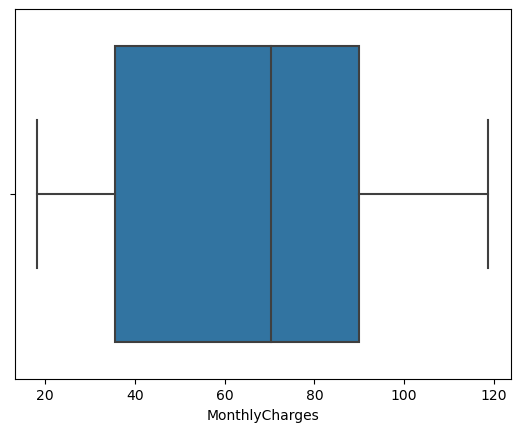

In [48]:
sns.boxplot(x='MonthlyCharges',  data=df)

<Axes: xlabel='TotalCharges'>

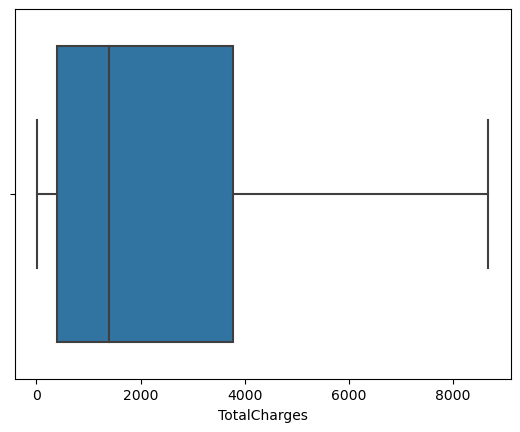

In [49]:
sns.boxplot(x='TotalCharges', data=df)

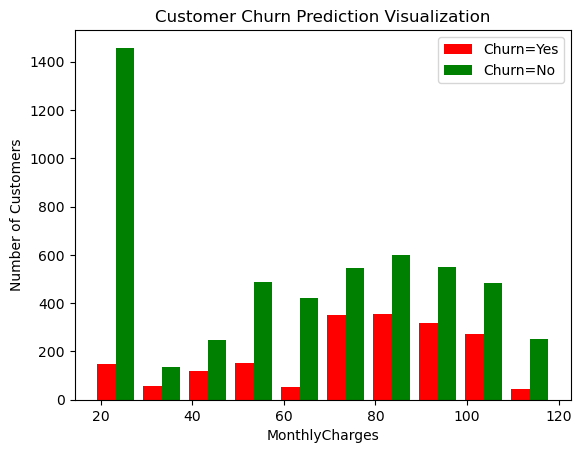

In [50]:
MonthlyCharges_Churn_no = df[df.Churn=='No'].MonthlyCharges
MonthlyCharges_Churn_Yes = df[df.Churn=='Yes'].MonthlyCharges
plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([MonthlyCharges_Churn_Yes, MonthlyCharges_Churn_no], color=['red', 'green'], label=['Churn=Yes','Churn=No'])
plt.legend()

<Axes: xlabel='numAdminTickets'>

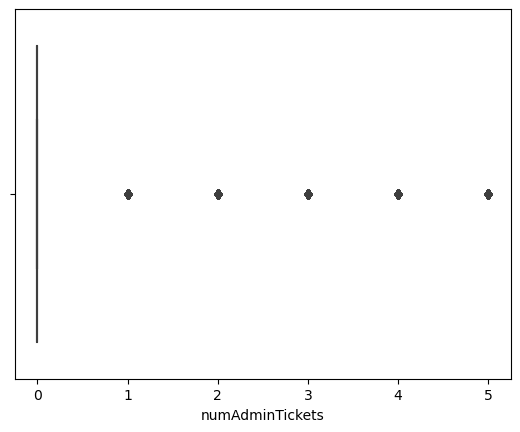

In [51]:
sns.boxplot(x='numAdminTickets', data=df)

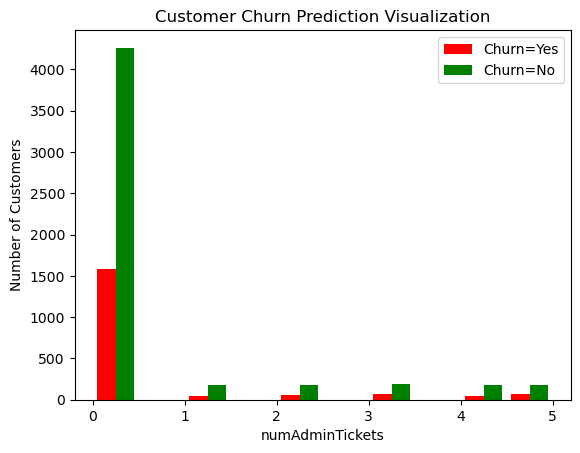

In [52]:
numAdminTickets_Churn_no = df[df.Churn=='No'].numAdminTickets
numAdminTickets_Churn_Yes = df[df.Churn=='Yes'].numAdminTickets
plt.xlabel('numAdminTickets')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([numAdminTickets_Churn_Yes, numAdminTickets_Churn_no], color=['red', 'green'], label=['Churn=Yes','Churn=No'])
plt.legend()

<Axes: xlabel='numTechTickets'>

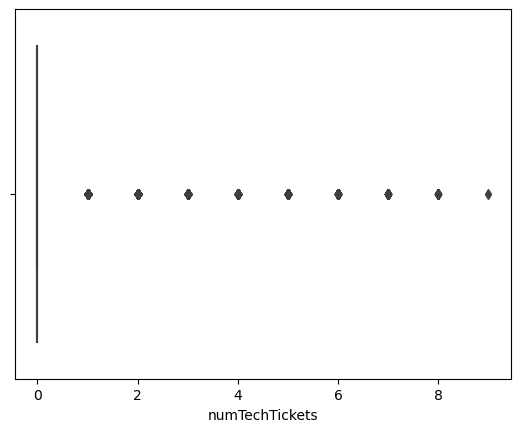

In [53]:
sns.boxplot(x='numTechTickets', data=df)

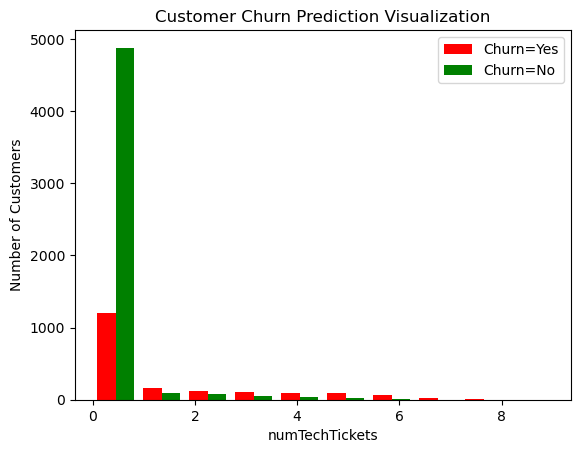

In [54]:
numTechTickets_Churn_no = df[df.Churn=='No'].numTechTickets
numTechTickets_Churn_Yes = df[df.Churn=='Yes'].numTechTickets
plt.xlabel('numTechTickets')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([numTechTickets_Churn_Yes, numTechTickets_Churn_no], color=['red', 'green'], label=['Churn=Yes','Churn=No'])
plt.legend()

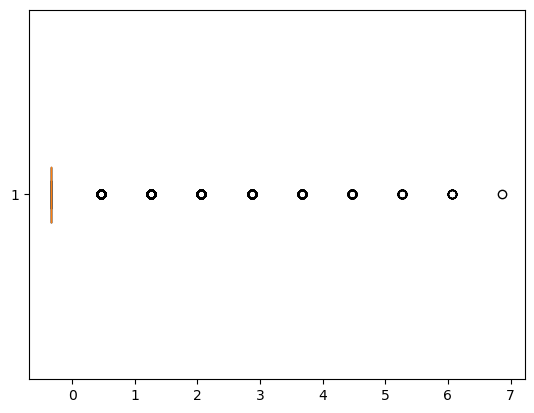

In [55]:
from scipy import stats

# Calculate Z-score for customer_age column
z_scores = stats.zscore(df['numTechTickets'])
plt.boxplot(z_scores,vert=False)

# Reatin rows with Z-score greater than -3 or less than +3
df = df[(z_scores >= -3) & (z_scores <= 3)]

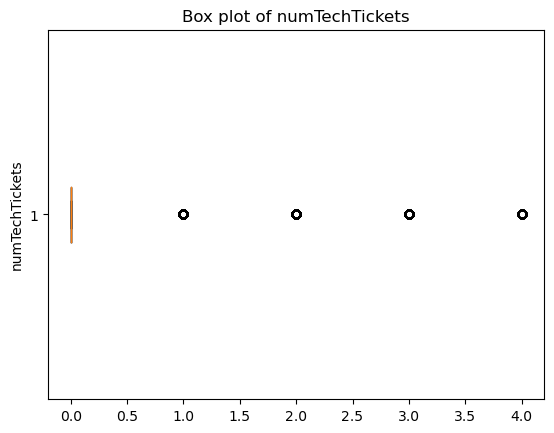

count    6814.000000
mean        0.241121
std         0.780546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: numTechTickets, dtype: float64 



In [56]:
plt.boxplot(df['numTechTickets'],vert=False)
plt.title('Box plot of numTechTickets')
plt.ylabel('numTechTickets')
plt.show()
print(df.numTechTickets.describe(),'\n')

In [57]:
df.drop(columns=['customerID','numAdminTickets','DeviceProtection','Dependents'], axis=1, inplace=True)

In [58]:
df = pd.get_dummies(df, drop_first=False)

In [59]:
df.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numTechTickets,gender_Female,gender_Male,Partner_No,Partner_Yes,PhoneService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889,0,0,1,1,0,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1


In [60]:
from sklearn.preprocessing import StandardScaler
  
# Separate the dummy variables from the numerical variables
dummy_cols = df.select_dtypes(include='uint8').columns
num_cols = list(set(df.select_dtypes(include=['float64', 'int64', 'int32']).columns) - set(dummy_cols))

# Standardize the numerical variables
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Combine the standardized numerical variables with the dummy variables
df_std = pd.concat([df[num_cols], df[dummy_cols]], axis=1)

print(df_std.head(5),'\n')
print(df_std.describe(),'\n')

   numTechTickets  MonthlyCharges    tenure  SeniorCitizen  TotalCharges  \
0       -0.308936       -1.138452 -1.249312      -0.434471     -0.974637   
1       -0.308936       -0.231746  0.104441      -0.434471     -0.130571   
2       -0.308936       -0.335465 -1.208289      -0.434471     -0.938787   
3        3.534808       -0.721903  0.555693      -0.434471     -0.152808   
4       -0.308936        0.228298 -1.208289      -0.434471     -0.919274   

   gender_Female  gender_Male  Partner_No  Partner_Yes  PhoneService_No  ...  \
0              1            0           0            1                1  ...   
1              0            1           1            0                0  ...   
2              0            1           1            0                0  ...   
3              0            1           1            0                1  ...   
4              1            0           1            0                0  ...   

   Contract_One year  Contract_Two year  PaperlessBilling_No  

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_std.drop(['Churn_Yes',
                                                                 'Churn_No'], axis=1), df['Churn_Yes'], test_size=0.2, random_state=50)

In [62]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [63]:
classifier = svm.SVC()

In [74]:
hyperparameters = {'kernel': ['rbf'],
                   'C': [0.01, 0.1, 1, 10],
                   'gamma': [0.01, 0.001, 0.1, 1, 10, 100]
                  

                  }

In [75]:
grid_search2 = GridSearchCV(classifier, hyperparameters, cv=5, n_jobs= -1, verbose= 1)
grid_search2.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [0.01, 0.001, 0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             verbose=1)

In [76]:
best_classifier2 = grid_search2.best_estimator_
print(best_classifier2,'\n')
y_pred2 = best_classifier2.predict(X_test)

SVC(C=1, gamma=0.1) 



In [77]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

[[936  71]
 [132 224]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1007
           1       0.76      0.63      0.69       356

    accuracy                           0.85      1363
   macro avg       0.82      0.78      0.80      1363
weighted avg       0.85      0.85      0.85      1363

0.851063829787234


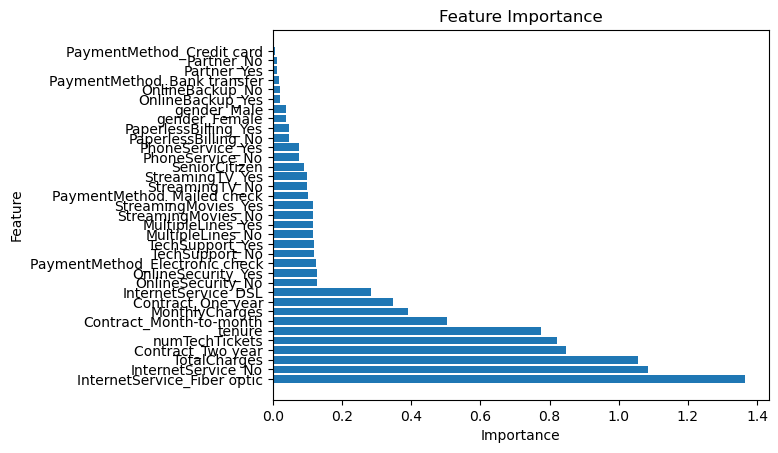

In [73]:
importance = np.abs(best_classifier2.coef_)
feature_names = X_train.columns

# sort the feature importance values in descending order
sorted_importance = sorted(zip(feature_names, importance[0]), key=lambda x: x[1], reverse=True)

# extract the sorted importance values and feature names
importance_values = [x[1] for x in sorted_importance]
feature_names = [x[0] for x in sorted_importance]

# plot the feature importance
import matplotlib.pyplot as plt
plt.barh(range(len(importance_values)), importance_values, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()